In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from math import pi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from langchain.tools import tool
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage
#from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("dataset.csv")

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#hapus kolom unmamed
df = df.drop(columns=['Unnamed: 0'])
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#cek missing value
df.isnull().sum()

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [ ]:
#bersihkan missing value
df = df.dropna()
df.isnull().sum()

,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [ ]:
#membuat label mood
def classify_mood(row):
  if row['valence'] >= 0.5 and row ['energy'] >= 0.5:
    return 'Happy'
  elif row['valence'] < 0.5 and row['energy'] < 0.5:
    return 'Sad'
  elif row['valence'] >= 0.5 and row['energy'] < 0.5:
    return 'Calm'
  else:
    return 'Tense'

In [ ]:
#membuat label target
df['mood_label'] = df.apply(classify_mood, axis=1)

In [ ]:
#membuat fitur untuk melatih model
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness',
            'instrumentalness', 'loudness', 'speechiness']

In [ ]:
#split x dan y
X = df[features]
y = df['mood_label']

In [ ]:
#encode target karena target masi string
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(91199, 8) (22800, 8)


In [ ]:
#random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1799
           1       1.00      1.00      1.00      8665
           2       1.00      1.00      1.00      4514
           3       1.00      1.00      1.00      7822

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800



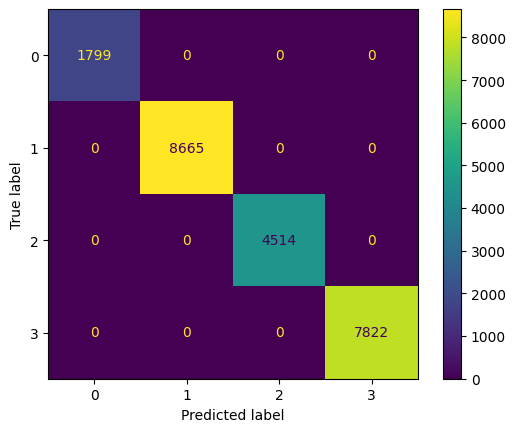

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.show()

#0 = calm
#1 = happy
#2 = sad
#3 = tense

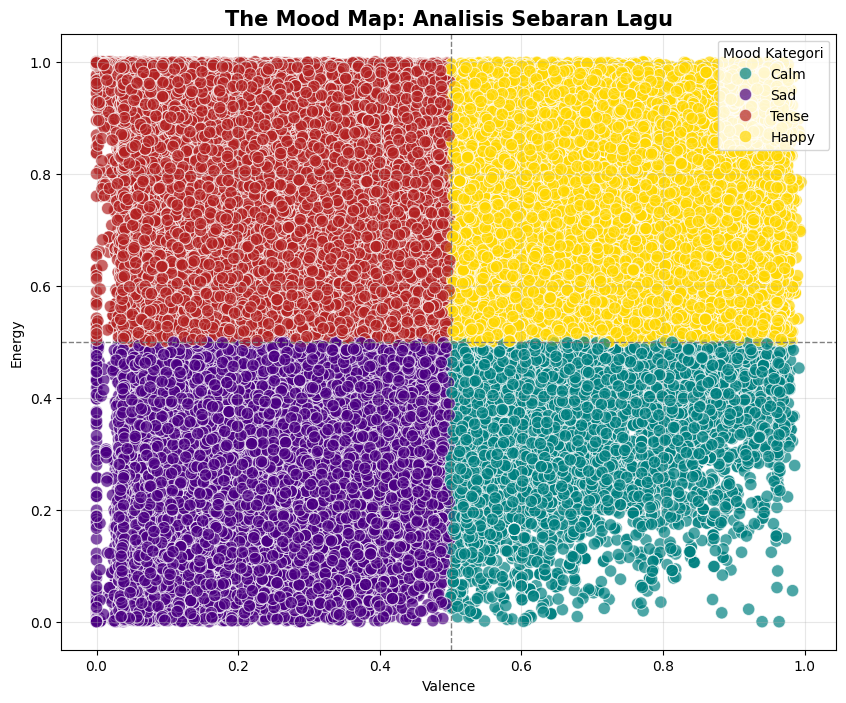

In [ ]:
#visualisasi data

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='valence',
    y='energy',
    hue='mood_label',
    palette={'Happy': '#FFD700', 'Sad': '#4B0082', 'Calm': '#008080', 'Tense': '#B22222'},
    s=80,
    alpha=0.7,
    edgecolor='white'
  )

plt.axvline(0.5, color='gray', linestyle='--', linewidth=1)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)


plt.title('The Mood Map: Analisis Sebaran Lagu', fontsize=15, weight='bold')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend(title='Mood Kategori', loc='upper right')
plt.grid(True, alpha=0.3)

plt.show()

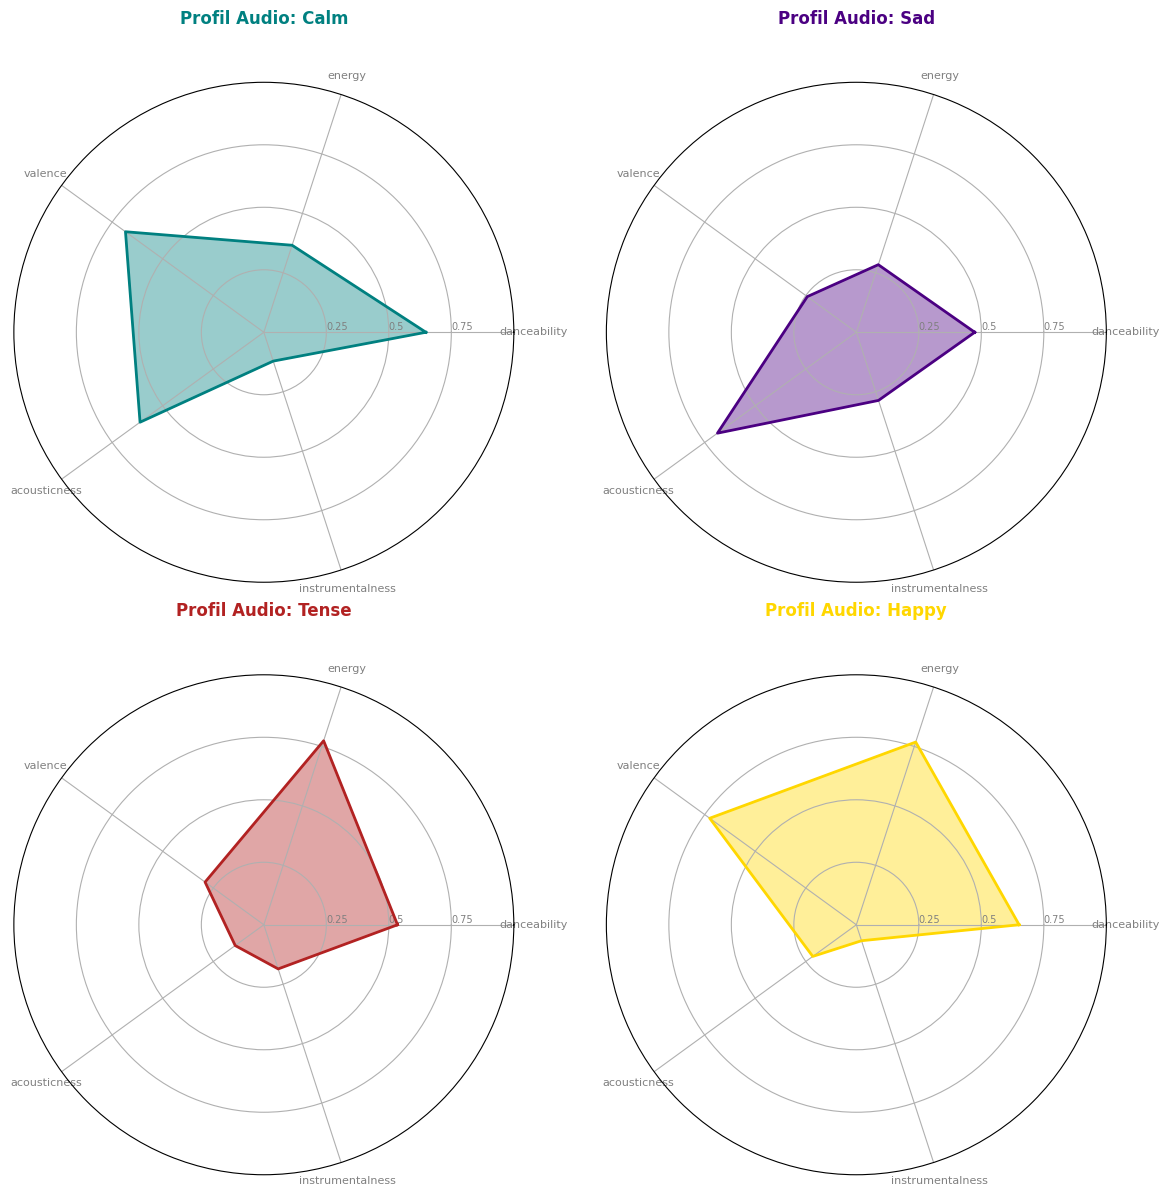

In [ ]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

# 2. Hitung Rata-rata per Mood
mood_means = df_scaled.groupby('mood_label')[features].mean().reset_index()

# 3. Setup Radar Chart Logic
categories = features
N = len(categories)

# Menentukan sudut (angle) untuk setiap fitur
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1] # Menutup lingkaran

# Membuat Plot
fig = plt.figure(figsize=(12, 12))
colors = {'Happy': '#FFD700', 'Sad': '#4B0082', 'Calm': '#008080', 'Tense': '#B22222'}

# Loop untuk membuat chart kecil per mood
unique_moods = df['mood_label'].unique()

for i, mood in enumerate(unique_moods):
    ax = plt.subplot(2, 2, i+1, polar=True)

    # Setup Sumbu
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0, 1)

    # Ambil Data
    values = mood_means[mood_means['mood_label'] == mood][categories].values.flatten().tolist()
    values += values[:1] # Menutup loop data

    # Gambar Garis
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors.get(mood, 'blue'))
    ax.fill(angles, values, color=colors.get(mood, 'blue'), alpha=0.4)

    plt.title(f"Profil Audio: {mood}", size=12, color=colors.get(mood, 'blue'), weight='bold', y=1.1)

plt.tight_layout()

plt.show()

In [ ]:
#save model
joblib.dump(rf_model, 'music_mood_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model dan Label Encoder berhasil disimpan!")

Model dan Label Encoder berhasil disimpan!


In [ ]:
rf_model = joblib.load("music_mood_model.pkl")
le = joblib.load("label_encoder.pkl")

In [ ]:
import joblib
model = joblib.load("music_mood_model.pkl")


In [ ]:
#Prediksi mood
@tool
def predict_mood(features_json: str):
    """Prediksi mood lagu berdasarkan fitur audio dalam format JSON."""
    order = [
        'danceability','energy','valence','tempo','acousticness',
        'instrumentalness','loudness','speechiness'
    ]

    data = json.loads(features_json)
    x = np.array([float(data[f]) for f in order]).reshape(1, -1)

    pred = rf_model.predict(x)[0]
    mood = label_encoder.inverse_transform([pred])[0]

    return {"predicted_mood": mood}

In [ ]:
#Rekomendasi musik
@tool
def recommend_music(mood: str):
    """Rekomendasi 5 lagu berdasarkan mood tertentu."""
    mood = mood.lower().strip()
    df_sel = df[df["mood_label"].str.lower() == mood]

    if df_sel.empty:
        return {"error": f"Tidak ada lagu dengan mood {mood}."}

    top5 = df_sel.sample(min(5, len(df_sel)))[["title","artist"]].to_dict(orient="records")
    return {"recommendations": top5}

In [ ]:
#Plot Mood Scatter
@tool
def plot_mood_scatter(mood: str):
    """Membuat scatter plot valence vs energy."""
    df2 = df.copy()
    if mood:
        df2 = df2[df2["mood_label"].str.lower() == mood.lower()]

    plt.figure(figsize=(8,6))
    plt.scatter(df2["valence"], df2["energy"], alpha=0.6)
    plt.axvline(0.5, color="gray", linestyle="--")
    plt.axhline(0.5, color="gray", linestyle="--")
    plt.xlabel("Valence")
    plt.ylabel("Energy")
    plt.title("Mood Scatter Plot")

    path = "mood_scatter.png"
    plt.savefig(path)
    plt.close()

    return {"plot_path": path}

In [ ]:
SystemMessage = """
Kamu adalah Chatbot Musik yang KETAT dan HANYA memberi jawaban berdasarkan dataset
melalui tools yang disediakan. Kamu TIDAK BOLEH menjawab dari pengetahuanmu sendiri.

=================================================
🎧 ATURAN UTAMA
=================================================

1. Jika user mengekspresikan perasaan atau mood:
   - Tentukan mood secara otomatis (sad, happy, calm, tense).
   - LANGSUNG panggil tool: recommend_music(mood).
   - Setelah tool selesai → beri 1 kalimat empatik pendek.
   - Tidak boleh menjawab selain hasil tool.

2. Kamu DILARANG:
   - mengarang lagu sendiri
   - menyebut lagu yang tidak ada di dataset
   - menjawab pertanyaan umum (cuaca, presiden, hewan, sejarah, teknologi)
   - menjawab tanpa tool jika mengenai rekomendasi musik

3. Jika user meminta:
   - grafik/diagram → gunakan plot_mood_scatter
   - prediksi mood dari JSON → gunakan predict_mood

4. Jika user bertanya hal non-musika:
   Jawab: "Maaf, saya hanya dapat membantu rekomendasi musik berdasarkan mood."

5. Semua rekomendasi HARUS 100% berasal dari dataset
   melalui tools yang disediakan.

=================================================
🎧 DETEKSI MOOD OTOMATIS
=================================================
sad  → sedih, galau, patah hati, kecewa, ditinggal
happy → senang, excited, bahagia, semangat
calm → capek, ingin tenang, butuh ketenangan, relax
tense → stres, cemas, panik, tertekan, pusing kuliah

=================================================
🎧 GAYA BAHASA
=================================================
- Jawab dengan bahasa yang sama seperti user.
- Singkat, hangat, empatik, tidak lebay.
- Setelah tool: beri satu kalimat manusiawi seperti:
  “Semoga lagu-lagu ini bisa nemenin kamu ya ✨”

=================================================
🎧 MISI UTAMA
=================================================
Memberi rekomendasi musik dari dataset
secepat, seakurat, dan sesingkat mungkin,
tanpa improvisasi, tanpa menjawab dari luar dataset.
"""


In [ ]:
import getpass, os
if "API_KEY_GEMINI" not in os.environ:
    os.environ["API_KEY_GEMINI"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


In [ ]:
!pip install -q -U langchain-google-genai

In [ ]:
!pip install -q langchain_google_genai langchain langgraph python-dotenv


In [ ]:
#ENV & LLM Setup
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from dotenv import load_dotenv
import os

# Embedding model
embeddings = GoogleGenerativeAIEmbeddings(
    model="models/embedding-001"
)

print(os.getenv("GOOGLE_APPLICATION_CREDENTIALS"))
load_dotenv()

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0.3,
    api_key=os.getenv("API_KEY_GEMINI")
)

None


In [ ]:
from langgraph.graph import StateGraph, MessagesState, START, END

from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.prebuilt import ToolNode



In [ ]:

# 2. DAFTAR TOOLS

tools = [predict_mood, recommend_music, plot_mood_scatter]

class AgentState(dict):
    messages: list

tool_node = ToolNode(tools)


In [ ]:

# 4. NODE: PANGGIL LLM
def call_llm(state: AgentState):
    messages = state["messages"]
    response = llm.invoke(messages)
    return {"messages": messages + [response]}


def should_use_tool(state: AgentState):
    last = state["messages"][-1]
    if hasattr(last, "tool_calls") and last.tool_calls:
        return "use_tool"
    return "end"

workflow = StateGraph(AgentState)

workflow.add_node("llm", call_llm)
workflow.add_node("use_tool", tool_node)

workflow.set_entry_point("llm")

workflow.add_conditional_edges(
    "llm",
    should_use_tool,
    {
        "use_tool": "use_tool",
        "end": END,
    }
)

workflow.add_edge("use_tool", "llm")

memory = MemorySaver()
agent = workflow.compile()


# 6. FUNGSI CHATBOT
def is_music_related(text: str) -> bool:
    """Cek apakah input user terkait musik atau mood."""
    text = text.lower()

    keywords = [
        "musik", "lagu", "genre", "mood", "sedih", "senang",
        "galau", "marah", "energi", "rekomendasi lagu",
        "musik sedih", "musik senang", "musik galau"
    ]

    # jika ada salah satu keyword yang cocok → topik musik
    return any(kw in text for kw in keywords)

def ask_bot(msg: str):
    # Filter: kalau di luar topik musik → JANGAN panggil LLM
    if not is_music_related(msg):
        reply = "maaf pertanyaan anda diluar cakupan."
        print("User:", msg)
        print("Bot :", reply)
        return reply

    # Panggil agent LangGraph dengan pesan user
    result = agent.invoke({"messages": [HumanMessage(content=msg)]})
    last_msg = result["messages"][-1]

    # pastikan ambil konten jawaban
    if hasattr(last_msg, "content"):
        reply = last_msg.content
    else:
        reply = str(last_msg)

    print("User:", msg)
    print("Bot :", reply)
    return reply

print("🎵 Chatbot Musik siap! Ketik 'exit' untuk keluar.")
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break
    import re
    questions = re.split(r'[.,\n]+', user_input)
    questions = [q.strip() for q in questions if q.strip()]

    # Jawab satu per satu
    for q in questions:
        ask_bot(q)


🎵 Chatbot Musik siap! Ketik 'exit' untuk keluar.
You: lagu yang cocok untuk menemani belajar
User: lagu yang cocok untuk menemani belajar
Bot : Tentu, berikut beberapa rekomendasi lagu yang cocok untuk menemani belajar, dikategorikan berdasarkan preferensi:

**Untuk Fokus dan Konsentrasi:**

*   **Musik Instrumental:**
    *   **Lo-fi Hip Hop:** Suara yang menenangkan, ritme yang stabil, dan tanpa lirik yang mengganggu. Contoh: "lofi hip hop radio - beats to relax/study to" di YouTube.
    *   **Classical Music:** Musik klasik, terutama dari era Baroque (Bach, Vivaldi, Handel), sering dikaitkan dengan peningkatan fokus.
    *   **Ambient Music:** Musik latar yang menenangkan dan membantu menciptakan suasana yang tenang. Contoh: Brian Eno, Stars of the Lid.
    *   **Video Game Soundtracks (Instrumental):** Beberapa soundtrack video game memiliki melodi yang menarik namun tidak mengganggu. Contoh: Soundtrack dari game seperti "Minecraft" atau "Stardew Valley".
    *   **Electronic Music